In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
df = pd.read_csv(r"C:\Users\jolin\Downloads\airline_passenger_satisfaction.csv")
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [40]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [41]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

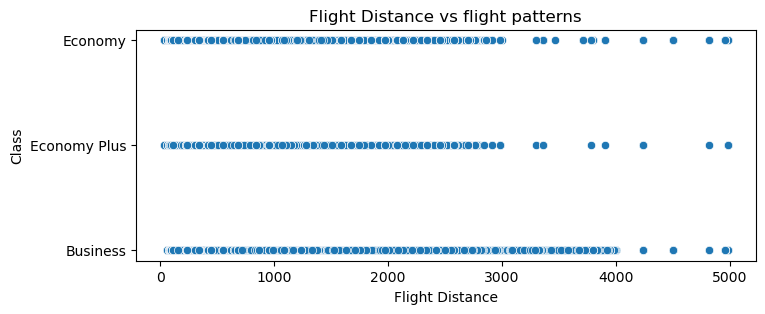

In [46]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance')
plt.ylabel('Class')